In [16]:
import pydicom
from pydicom import dcmread
import matplotlib
import matplotlib.pyplot as plt
import cv2
import streamlit as st
from PIL import Image

In [7]:
file = dcmread('Dicoms/1.3.12.2.1107.5.4.5.170043.30000022020709313817500000095.dcm')

In [8]:
pixel_data = file.pixel_array

In [9]:
selectedFrame = pixel_data[30, :, :]
selectedFrame = cv2.resize(selectedFrame, (512,512))

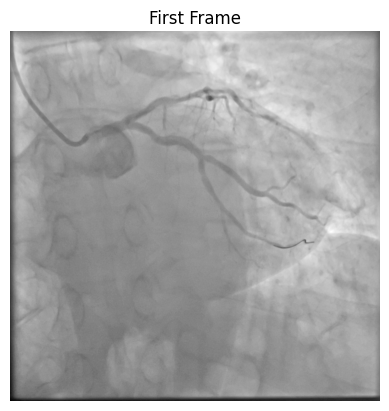

In [17]:
if len(pixel_data.shape) > 2:  # Если есть несколько кадров
    first_frame = pixel_data[30]  # Берем первый кадр
else:
    first_frame = pixel_data  # Если только один кадр

# Отображаем первый кадр
plt.imshow(first_frame, cmap='gray')
plt.axis('off')
plt.title('First Frame')
plt.show()

In [19]:
import os
import torch
import pooch

# Загрузка весов модели
segmentationModelWeights = pooch.retrieve(
    url="doi:10.5281/zenodo.13848135/modelWeights-InternalData-inceptionresnetv2-fold2-e40-b10-a4.pth",
    known_hash="md5:bf893ef57adaf39cfee33b25c7c1d87b",
)

# 1. Проверка, что файл существует и не пустой
if os.path.exists(segmentationModelWeights):
    file_size = os.path.getsize(segmentationModelWeights)
    if file_size > 0:
        print(f"Файл весов загружен, размер: {file_size} байт")
    else:
        print("Файл пустой!")
else:
    print("Файл не был загружен!")

# 2. Попытка загрузить веса в PyTorch и проверить их содержимое
try:
    weights = torch.load(segmentationModelWeights, map_location='cpu')  # Загружаем на CPU для проверки
    if weights:
        print("Веса успешно загружены, они не пустые.")
        # Можно дополнительно проверить ключи или структуру
        print("Ключи в словаре весов:", list(weights.keys())[:5])  # Первые 5 ключей для примера
    else:
        print("Веса загружены, но словарь пуст!")
except Exception as e:
    print(f"Ошибка при загрузке весов: {e}")

Файл весов загружен, размер: 248888067 байт
Веса успешно загружены, они не пустые.
Ключи в словаре весов: ['module.encoder.conv2d_1a.conv.weight', 'module.encoder.conv2d_1a.bn.weight', 'module.encoder.conv2d_1a.bn.bias', 'module.encoder.conv2d_1a.bn.running_mean', 'module.encoder.conv2d_1a.bn.running_var']


In [20]:
import pydicom
import numpy as np
from pydicom.pixel_data_handlers.util import apply_voi_lut

# Загрузка DICOM-файла
dcm = pydicom.dcmread('Dicoms/1.3.12.2.1107.5.4.5.170043.30000022020709313817500000095.dcm')

# Извлечение пиксельных данных
if 'PixelData' in dcm:
    pixel_array = dcm.pixel_array

    # Применение VOI LUT, если параметры доступны
    if 'VOILUTSequence' in dcm or ('WindowCenter' in dcm and 'WindowWidth' in dcm):
        pixel_array = apply_voi_lut(pixel_array, dcm)
    else:
        # Ручная нормализация в диапазон 0–255
        pixel_array = (pixel_array - np.min(pixel_array)) / (np.max(pixel_array) - np.min(pixel_array)) * 255.0

    # Преобразование в uint8
    pixel_array_uint8 = pixel_array.astype(np.uint8)

    # Теперь pixel_array_uint8 готов для отображения
else:
    print("В файле отсутствуют пиксельные данные")

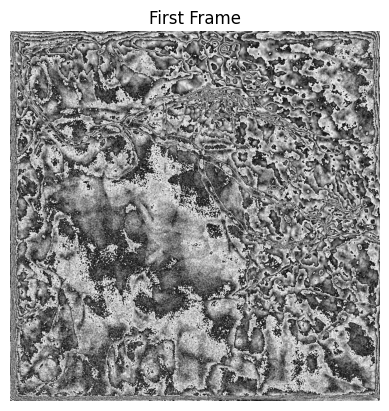

In [22]:
if len(pixel_array_uint8.shape) > 2:  # Если есть несколько кадров
    first_frame = pixel_array_uint8[30]  # Берем первый кадр
else:
    first_frame = pixel_array_uint8  # Если только один кадр

# Отображаем первый кадр
plt.imshow(first_frame, cmap='gray')
plt.axis('off')
plt.title('First Frame')
plt.show()